<a href="https://colab.research.google.com/github/daiweiworking/BenchmarkDeepLearning/blob/master/Pig_Fox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

import torch
import torch.nn as nn
from torchvision.models import resnet50

# simple Module to normalize an image
class Normalize(nn.Module):
    def __init__(self, mean, std):
        super(Normalize, self).__init__()
        self.mean = torch.Tensor(mean)
        self.std = torch.Tensor(std)
    def forward(self, x):
        return (x - self.mean.type_as(x)[None,:,None,None]) / self.std.type_as(x)[None,:,None,None]

# values are standard normalization for ImageNet images, 
# from https://github.com/pytorch/examples/blob/master/imagenet/main.py
norm = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# load pre-trained ResNet50, and put into evaluation mode (necessary to e.g. turn off batchnorm)
model = resnet50(pretrained=True)
model.eval();
pred = model(norm(pig_tensor))

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [6]:
#!wget https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
import json
with open("imagenet_class_index.json") as f:
    imagenet_classes = {int(i):x[1] for i,x in json.load(f).items()}

max_class = pred.max(dim=1)[1].item()
print(imagenet_classes[max_class])
print(nn.CrossEntropyLoss()(model(norm(pig_tensor)),torch.LongTensor([341])).item())
print("Predicted probability:", nn.Softmax(dim=1)(pred)[0,max_class].item())

hog
0.05511913448572159
Predicted probability: 0.946372389793396


In [7]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("pig.jpg")[...,::-1]/255.0
noise =  np.random.normal(loc=0, scale=1, size=img.shape)
noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)

In [99]:
import json
with open("imagenet_class_index.json") as f:
    imagenet_classes = {int(i):x[1] for i,x in json.load(f).items()}
print(imagenet_classes[pred.max(dim=1)[1].item()])

chow


In [100]:

import torch.optim as optim
epsilon = 2./255

#delta = torch.zeros_like(pig_tensor_noise, requires_grad=True)

delta = torch.zeros_like(pig_tensor_noise, requires_grad=True)
opt = optim.SGD([delta], lr=5e-3)

for t in range(100):
    pred = model(norm(pig_tensor_noise + delta))
    loss = (-nn.CrossEntropyLoss()(pred, torch.LongTensor([341])) + 
            nn.CrossEntropyLoss()(pred, torch.LongTensor([404])))
    if t % 10 == 0:
        print(t, loss.item())
    
    opt.zero_grad()
    loss.backward()
    opt.step()
    delta.data.clamp_(-epsilon, epsilon)

0 8.3462495803833
10 -2.5593671798706055
20 -6.902785778045654
30 -10.07697868347168
40 -12.598630905151367
50 -14.966266632080078
60 -17.348846435546875
70 -19.735000610351562
80 -21.923337936401367
90 -24.140207290649414


In [101]:
max_class = pred.max(dim=1)[1].item()
print("Predicted class: ", imagenet_classes[max_class])
print("Predicted probability:", nn.Softmax(dim=1)(pred)[0,max_class].item())

Predicted class:  airliner
Predicted probability: 0.9183480739593506


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


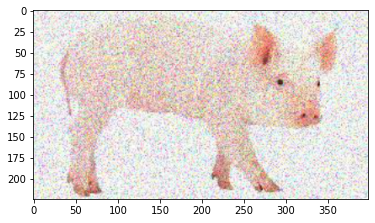

In [125]:
plt.imshow((pig_tensor_noise + delta)[0].detach().numpy().transpose(1,2,0))

In [129]:
obj= (pig_tensor_noise+delta)[0].detach().numpy().transpose(1,2,0)
plt.imsave("pigCoat3.jpg", np.clip(obj, 0, 1))


Predicted class:  Arctic_fox
Predicted probability: 0.10635510832071304


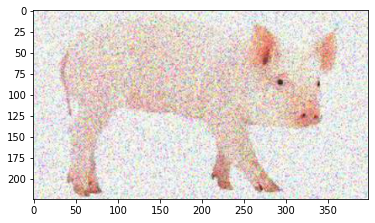

In [121]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# read the image, resize to 224 and convert to PyTorch Tensor

pig_img_noiseNew = Image.open("pigCoat3.jpg")

plt.imshow(pig_img_noiseNew )
preprocess = transforms.Compose([
   transforms.Resize(224),
   transforms.ToTensor(),
])
pig_img_noiseNew2 = preprocess(pig_img_noiseNew)[None,:,:,:]

# plot image (note that numpy using HWC whereas Pytorch user CHW, so we need to convert)
#plt.imshow(pig_img_noiseNew2[0].numpy().transpose(1,2,0))

import torch
import torch.nn as nn
from torchvision.models import resnet50

# simple Module to normalize an image
class Normalize(nn.Module):
    def __init__(self, mean, std):
        super(Normalize, self).__init__()
        self.mean = torch.Tensor(mean)
        self.std = torch.Tensor(std)
    def forward(self, x):
        return (x - self.mean.type_as(x)[None,:,None,None]) / self.std.type_as(x)[None,:,None,None]

# values are standard normalization for ImageNet images, 
# from https://github.com/pytorch/examples/blob/master/imagenet/main.py
norm = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# load pre-trained ResNet50, and put into evaluation mode (necessary to e.g. turn off batchnorm)
model = resnet50(pretrained=True)
model.eval();

pred2 = model(norm(pig_img_noiseNew2))

max_class = pred2.max(dim=1)[1].item()
print("Predicted class: ", imagenet_classes[max_class])
print("Predicted probability:", nn.Softmax(dim=1)(pred2)[0,max_class].item())

